In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# I. Data Preparation

In [106]:
weather = pd.read_csv('dataset/Weather.csv')
weather.head()


date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  1/1/2014 0:00        -3        -6           0.0      8.7        2   
1  1/1/2014 1:00        -3        -6           0.0      8.7        2   
2  1/1/2014 2:00        -3        -6           0.0      8.7        2   
3  1/1/2014 3:00        -3        -6           0.0      8.7        2   
4  1/1/2014 4:00        -3        -6           0.0      8.7        2   

   moon_illumination moonrise  moonset  sunrise  ... WindChillC  WindGustKmph  \
0                  1  6:58 AM  5:05 PM  7:12 AM  ...        -11            28   
1                  1  6:58 AM  5:05 PM  7:12 AM  ...        -12            31   
2                  1  6:58 AM  5:05 PM  7:12 AM  ...        -12            34   
3                  1  6:58 AM  5:05 PM  7:12 AM  ...        -13            36   
4                  1  6:58 AM  5:05 PM  7:12 AM  ...        -13            32   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0           3        58       0.0      1022     -4          10            273   
1           4        58       0.0      1023     -5          10            274   
2           5        58       0.0      1024     -5          10            276   
3           6        58       0.0      1024     -5          10            278   
4           9        57       0.0      1025     -6          10            271   

   windspeedKmph  
0             20  
1             22  
2             25  
3             27  
4             23  

[5 rows x 24 columns]

In [107]:
sample_submission = pd.read_csv('dataset/sample_submission.csv')
sample_submission.head()

Timestamp  % Baseline
0   Oct 1, 2017 6am      0.0005
1   Oct 1, 2017 7am      0.0005
2   Oct 1, 2017 8am      0.0005
3   Oct 1, 2017 9am      0.0005
4  Oct 1, 2017 10am      0.0005

In [108]:
solar_irradiance_2014 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2014.csv')
solar_irradiance_2015 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2015.csv')
solar_irradiance_2016 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2016.csv')
solar_irradiance_2017 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2017.csv')

In [109]:
solar_irradiance_2014.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  2014      1    1     0       0  0.0  0.0  0.0           0.0           0.0   
1  2014      1    1     1       0  0.0  0.0  0.0           0.0           0.0   
2  2014      1    1     2       0  0.0  0.0  0.0           0.0           0.0   
3  2014      1    1     3       0  0.0  0.0  0.0           0.0           0.0   
4  2014      1    1     4       0  0.0  0.0  0.0           0.0           0.0   

   Clearsky GHI      Cloud Type  Dew Point  Solar Zenith Angle  \
0           0.0  Probably Clear         -6              124.02   
1           0.0  Probably Clear         -5              135.09   
2           0.0  Probably Clear         -5              145.77   
3           0.0  Probably Clear         -6              155.07   
4           0.0  Probably Clear         -8              160.55   

   Surface Albedo  Wind Speed  Relative Humidity  Temperature  Pressure  
0            0.12         3.5              78.43           -3      1010  
1            0.12         3.8              81.74           -3      1010  
2            0.12         4.2              81.25           -3      1010  
3            0.12         4.5              74.14           -3      1010  
4            0.12         4.6              72.80           -4      1010

In [110]:
solar_irradiance_2014.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
DHI                   float64
DNI                   float64
GHI                   float64
Clearsky DHI          float64
Clearsky DNI          float64
Clearsky GHI          float64
Cloud Type             object
Dew Point               int64
Solar Zenith Angle    float64
Surface Albedo        float64
Wind Speed            float64
Relative Humidity     float64
Temperature             int64
Pressure                int64
dtype: object

In [111]:
solar_irradiance = pd.concat([solar_irradiance_2014, solar_irradiance_2015, solar_irradiance_2016, solar_irradiance_2017])

In [112]:
# Check is the dataset already concatenated
solar_irradiance.Year.unique()

array([2014, 2015, 2016, 2017], dtype=int64)

In [113]:
solar_irradiance.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [114]:
solar_irradiance.dropna()

Year  Month  Day  Hour  Minute   DHI    DNI    GHI  Clearsky DHI  \
0     2014      1    1     0       0   0.0    0.0    0.0           0.0   
1     2014      1    1     1       0   0.0    0.0    0.0           0.0   
2     2014      1    1     2       0   0.0    0.0    0.0           0.0   
3     2014      1    1     3       0   0.0    0.0    0.0           0.0   
4     2014      1    1     4       0   0.0    0.0    0.0           0.0   
...    ...    ...  ...   ...     ...   ...    ...    ...           ...   
8752  2017     12   31    16       0  61.0  834.0  409.0          86.0   
8753  2017     12   31    17       0  93.0  659.0  362.0          84.0   
8757  2017     12   31    21       0   0.0    0.0    0.0           0.0   
8758  2017     12   31    22       0   0.0    0.0    0.0           0.0   
8759  2017     12   31    23       0   0.0    0.0    0.0           0.0   

      Clearsky DNI  Clearsky GHI          Cloud Type  Dew Point  \
0              0.0           0.0      Probably Clear         -6   
1              0.0           0.0      Probably Clear         -5   
2              0.0           0.0      Probably Clear         -5   
3              0.0           0.0      Probably Clear         -6   
4              0.0           0.0      Probably Clear         -8   
...            ...           ...                 ...        ...   
8752         902.0         464.0         Overlapping        -14   
8753         895.0         449.0         Overlapping        -14   
8757           0.0           0.0  Super-Cooled Water        -13   
8758           0.0           0.0      Probably Clear        -13   
8759           0.0           0.0  Super-Cooled Water        -14   

      Solar Zenith Angle  Surface Albedo  Wind Speed  Relative Humidity  \
0                 124.02           0.120         3.5              78.43   
1                 135.09           0.120         3.8              81.74   
2                 145.77           0.120         4.2              81.25   
3                 155.07           0.120         4.5              74.14   
4                 160.55           0.120         4.6              72.80   
...                  ...             ...         ...                ...   
8752               65.28           0.866         4.9              68.51   
8753               65.93           0.866         4.8              64.90   
8757               92.18           0.866         4.8              79.66   
8758              102.27           0.866         4.9              85.39   
8759              112.97           0.866         4.9              84.26   

      Temperature  Pressure  
0              -3      1010  
1              -3      1010  
2              -3      1010  
3              -3      1010  
4              -4      1010  
...           ...       ...  
8752          -10      1010  
8753           -9      1010  
8757          -11      1010  
8758          -12      1010  
8759          -12      1010  

[32287 rows x 19 columns]

In [115]:
solar_irradiance.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
DHI                   float64
DNI                   float64
GHI                   float64
Clearsky DHI          float64
Clearsky DNI          float64
Clearsky GHI          float64
Cloud Type             object
Dew Point               int64
Solar Zenith Angle    float64
Surface Albedo        float64
Wind Speed            float64
Relative Humidity     float64
Temperature             int64
Pressure                int64
dtype: object

In [116]:
solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type']] = solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type']].astype('category')

In [117]:
solar_irradiance.head()

Year Month Day Hour Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  2014     1   1    0      0  0.0  0.0  0.0           0.0           0.0   
1  2014     1   1    1      0  0.0  0.0  0.0           0.0           0.0   
2  2014     1   1    2      0  0.0  0.0  0.0           0.0           0.0   
3  2014     1   1    3      0  0.0  0.0  0.0           0.0           0.0   
4  2014     1   1    4      0  0.0  0.0  0.0           0.0           0.0   

   Clearsky GHI      Cloud Type  Dew Point  Solar Zenith Angle  \
0           0.0  Probably Clear         -6              124.02   
1           0.0  Probably Clear         -5              135.09   
2           0.0  Probably Clear         -5              145.77   
3           0.0  Probably Clear         -6              155.07   
4           0.0  Probably Clear         -8              160.55   

   Surface Albedo  Wind Speed  Relative Humidity  Temperature  Pressure  
0            0.12         3.5              78.43           -3      1010  
1            0.12         3.8              81.74           -3      1010  
2            0.12         4.2              81.25           -3      1010  
3            0.12         4.5              74.14           -3      1010  
4            0.12         4.6              72.80           -4      1010

## Create timestamp column

In [118]:
solar_irradiance['Timestamp'] = pd.to_datetime(solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute']])

## Feature Engineering

In [119]:
solar_irradiance['DayOfYear'] = solar_irradiance['Timestamp'].dt.dayofyear
solar_irradiance['HourOfDay'] = solar_irradiance['Timestamp'].dt.hour
solar_irradiance['ClearSkyIndex_GHI'] = solar_irradiance['GHI'] / solar_irradiance['Clearsky GHI']
solar_irradiance['ClearSkyIndex_DNI'] = solar_irradiance['DNI'] / solar_irradiance['Clearsky DNI']
solar_irradiance['ClearSkyIndex_DHI'] = solar_irradiance['DHI'] / solar_irradiance['Clearsky DHI']


# II. Exploratory Data Analysis

In [120]:
solar_irradiance.describe()

DHI           DNI           GHI  Clearsky DHI  Clearsky DNI  \
count  32287.000000  32287.000000  32287.000000  32287.000000  32287.000000   
mean      63.998266    200.267662    175.805309     49.084399    319.043051   
std       97.300794    317.422544    260.991982     62.641598    371.681836   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%      101.000000    367.000000    305.000000     98.000000    727.000000   
max      476.000000   1019.000000   1006.000000    416.000000   1019.000000   

       Clearsky GHI     Dew Point  Solar Zenith Angle  Surface Albedo  \
count  32287.000000  35064.000000        35064.000000    35064.000000   
mean     232.203921      6.565338           89.692060        0.231987   
std      307.894374      8.813138           35.050706        0.256447   
min        0.000000    -19.000000           18.950000        0.106000   
25%        0.000000      0.000000           62.600000        0.119000   
50%        0.000000      7.000000           89.675000        0.131000   
75%      464.000000     14.000000          116.640000        0.144000   
max     1012.000000     24.000000          161.150000        0.866000   

         Wind Speed  Relative Humidity   Temperature      Pressure  \
count  35064.000000       35064.000000  35064.000000  35064.000000   
mean       2.716022          83.034807      9.830424   1007.375371   
std        1.361537          15.843646      9.315040      8.734413   
min        0.100000          29.820000    -19.000000    970.000000   
25%        1.700000          72.040000      2.000000   1000.000000   
50%        2.500000          86.700000     10.000000   1010.000000   
75%        3.500000          97.900000     18.000000   1010.000000   
max       11.000000         100.000000     32.000000   1040.000000   

          DayOfYear     HourOfDay  ClearSkyIndex_GHI  ClearSkyIndex_DNI  \
count  35064.000000  35064.000000       14756.000000       14755.000000   
mean     183.125257     11.500000           0.765865           0.623476   
std      105.440146      6.922285           0.300288           0.429327   
min        1.000000      0.000000           0.012480           0.000000   
25%       92.000000      5.750000           0.542629           0.107577   
50%      183.000000     11.500000           1.000000           1.000000   
75%      274.000000     17.250000           1.000000           1.000000   
max      366.000000     23.000000           1.000000           1.483871   

       ClearSkyIndex_DHI  
count       14756.000000  
mean            1.267093  
std             0.626474  
min             0.032787  
25%             1.000000  
50%             1.000000  
75%             1.442654  
max             4.575758

In [121]:
print(solar_irradiance.dtypes)

Year                        category
Month                       category
Day                         category
Hour                        category
Minute                      category
DHI                          float64
DNI                          float64
GHI                          float64
Clearsky DHI                 float64
Clearsky DNI                 float64
Clearsky GHI                 float64
Cloud Type                  category
Dew Point                      int64
Solar Zenith Angle           float64
Surface Albedo               float64
Wind Speed                   float64
Relative Humidity            float64
Temperature                    int64
Pressure                       int64
Timestamp             datetime64[ns]
DayOfYear                      int64
HourOfDay                      int64
ClearSkyIndex_GHI            float64
ClearSkyIndex_DNI            float64
ClearSkyIndex_DHI            float64
dtype: object


C:\Users\acer\AppData\Local\Temp\ipykernel_2436\683996770.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = solar_irradiance.corr()


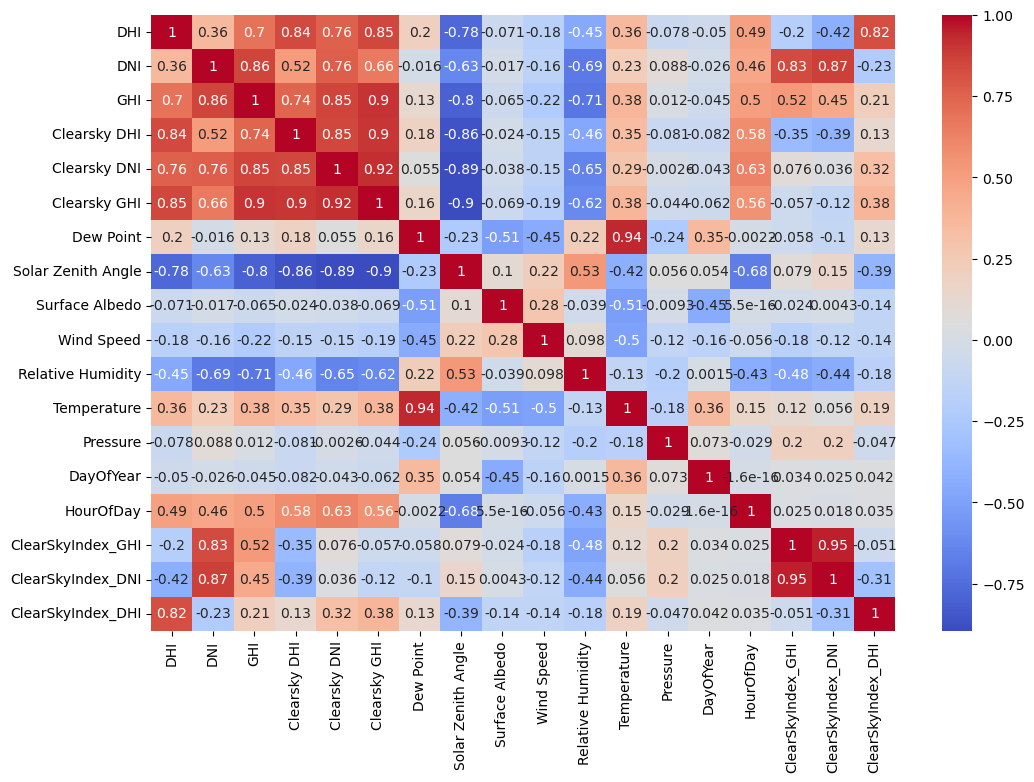

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = solar_irradiance.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



## 4. Time Series Analysis

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\2018988736.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = s_irradiance.resample('W').mean()


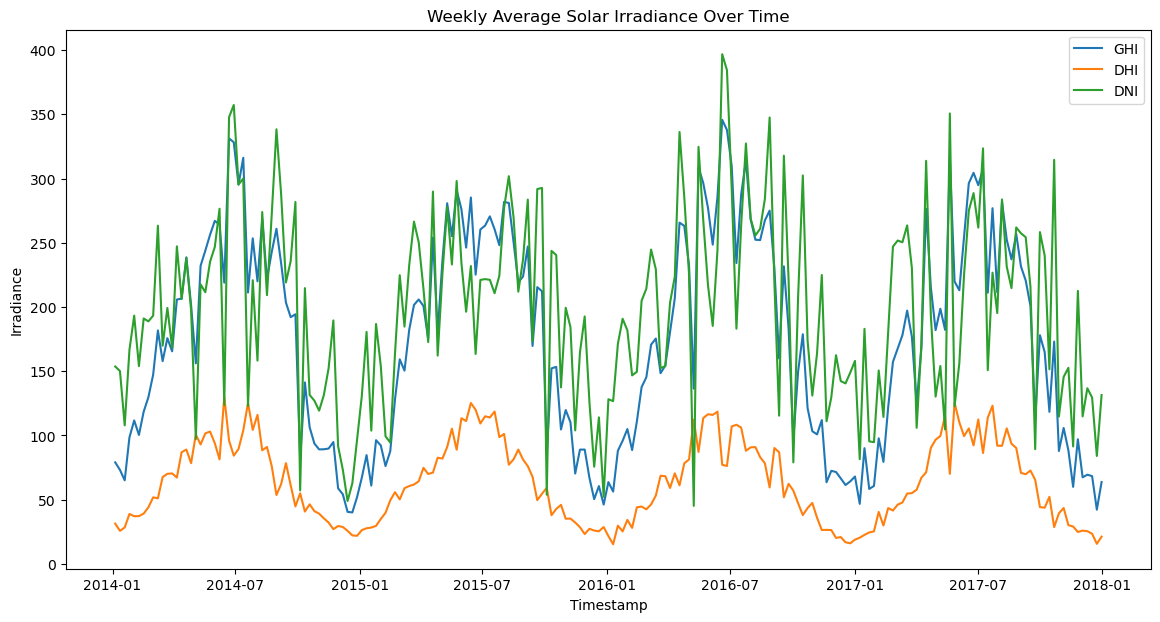

In [124]:
# Resample the data to weekly averages
s_irradiance = solar_irradiance.copy()
s_irradiance.set_index('Timestamp', inplace=True)
weekly_data = s_irradiance.resample('W').mean()

# Plot the resampled data
plt.figure(figsize=(14, 7))
plt.plot(weekly_data.index, weekly_data['GHI'], label='GHI')
plt.plot(weekly_data.index, weekly_data['DHI'], label='DHI')
plt.plot(weekly_data.index, weekly_data['DNI'], label='DNI')
plt.legend()
plt.title('Weekly Average Solar Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance')
plt.show()


## 5. Distribution Analysis

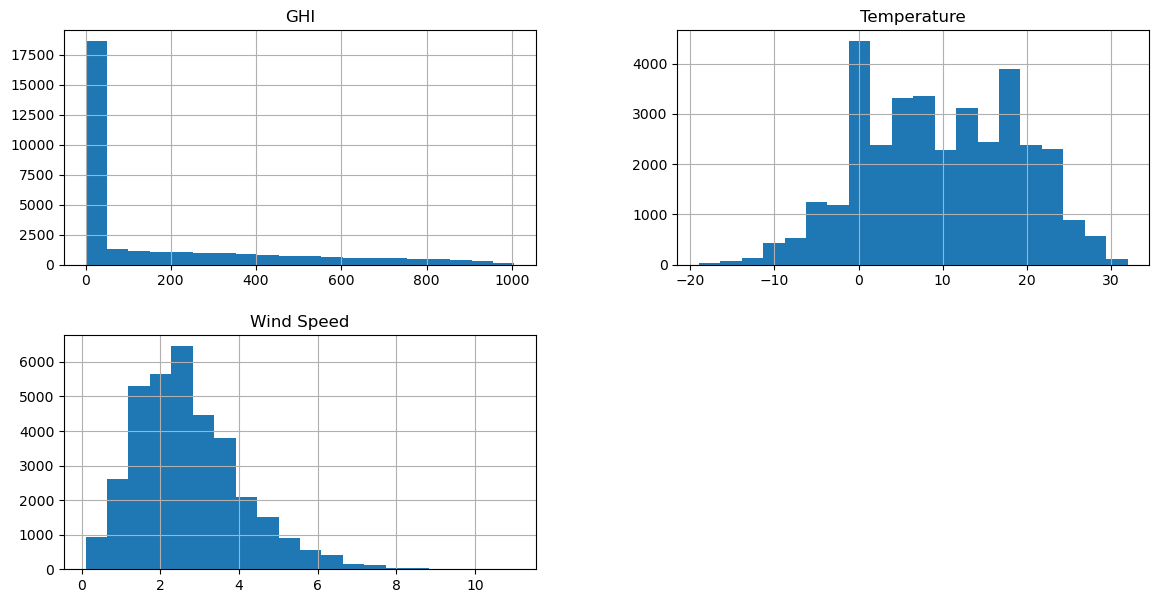

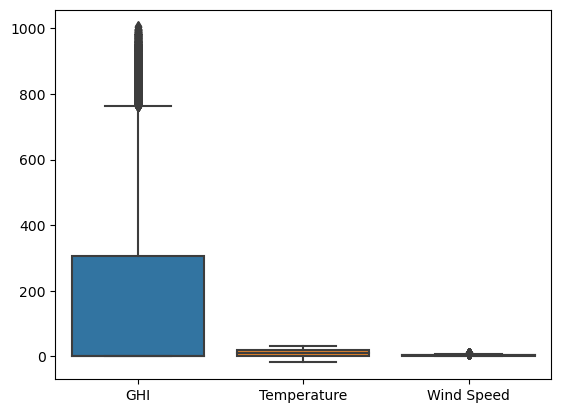

In [125]:
# Histogram
solar_irradiance[['GHI', 'Temperature', 'Wind Speed']].hist(bins=20, figsize=(14, 7))
plt.show()

# Boxplot
sns.boxplot(data=solar_irradiance[['GHI', 'Temperature', 'Wind Speed']])
plt.show()


## 6. Impact of Categorical Variables

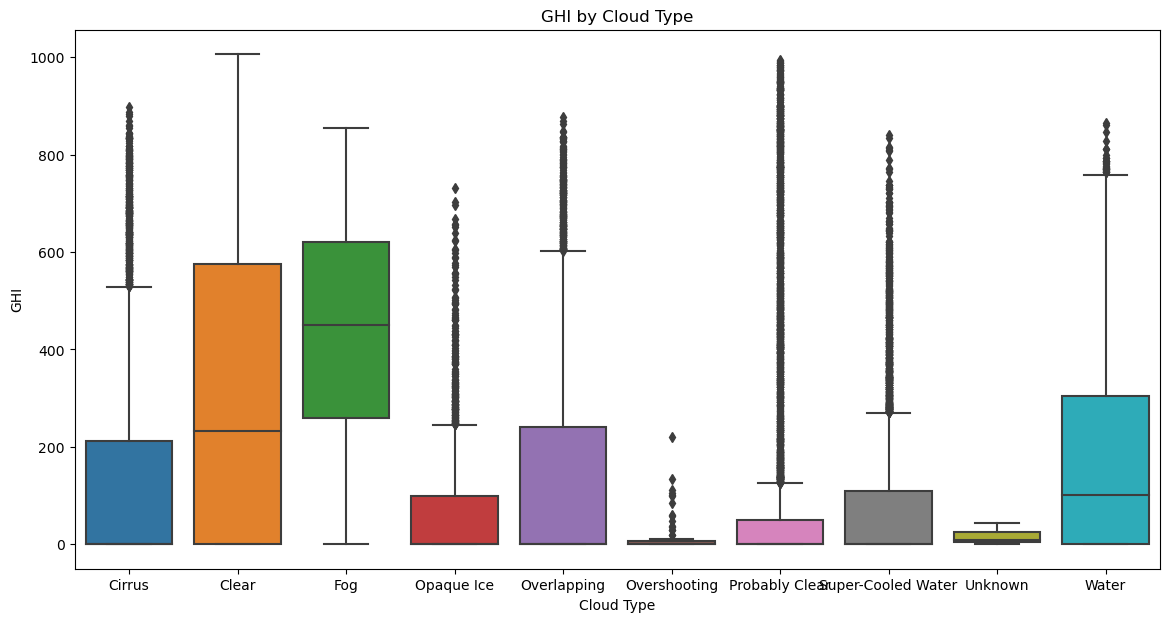

In [126]:
# Boxplot by Cloud Type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Cloud Type', y='GHI', data=solar_irradiance)
plt.title('GHI by Cloud Type')
plt.show()


# III Model and RMSE

## Train-Test Split

In [127]:
# train = solar_irradiance[solar_irradiance['Timestamp'] < '2017-10-01']
# test = solar_irradiance[solar_irradiance['Timestamp'] >= '2017-10-01']

train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

# Check the columns and data types
print(train_data.info())
print(test_data.info())

# Summary statistics for numerical features in the training data
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942 entries, 0 to 18941
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   18942 non-null  object 
 1   % Baseline  18942 non-null  float64
dtypes: float64(1), object(1)
memory usage: 296.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   1077 non-null   object 
 1   % Baseline  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 17.0+ KB
None
         % Baseline
count  18942.000000
mean       0.242342
std        0.256525
min        0.000000
25%        0.031800
50%        0.134700
75%        0.407700
max        1.016900
Timestamp     0
% Baseline    0
dtype: int64
Timestamp        0
% Baseline    1077
dtype: int64


In [128]:
# Example of filling missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)


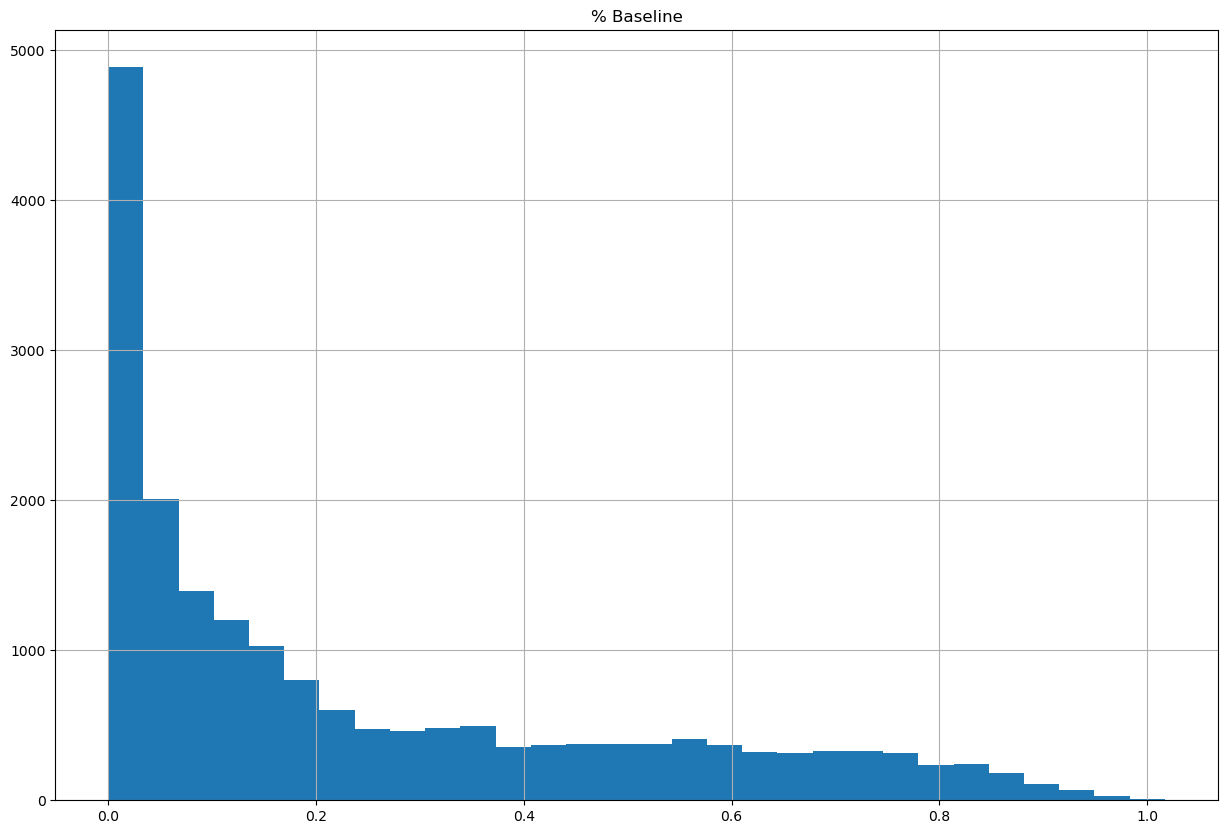

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical features
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

### a

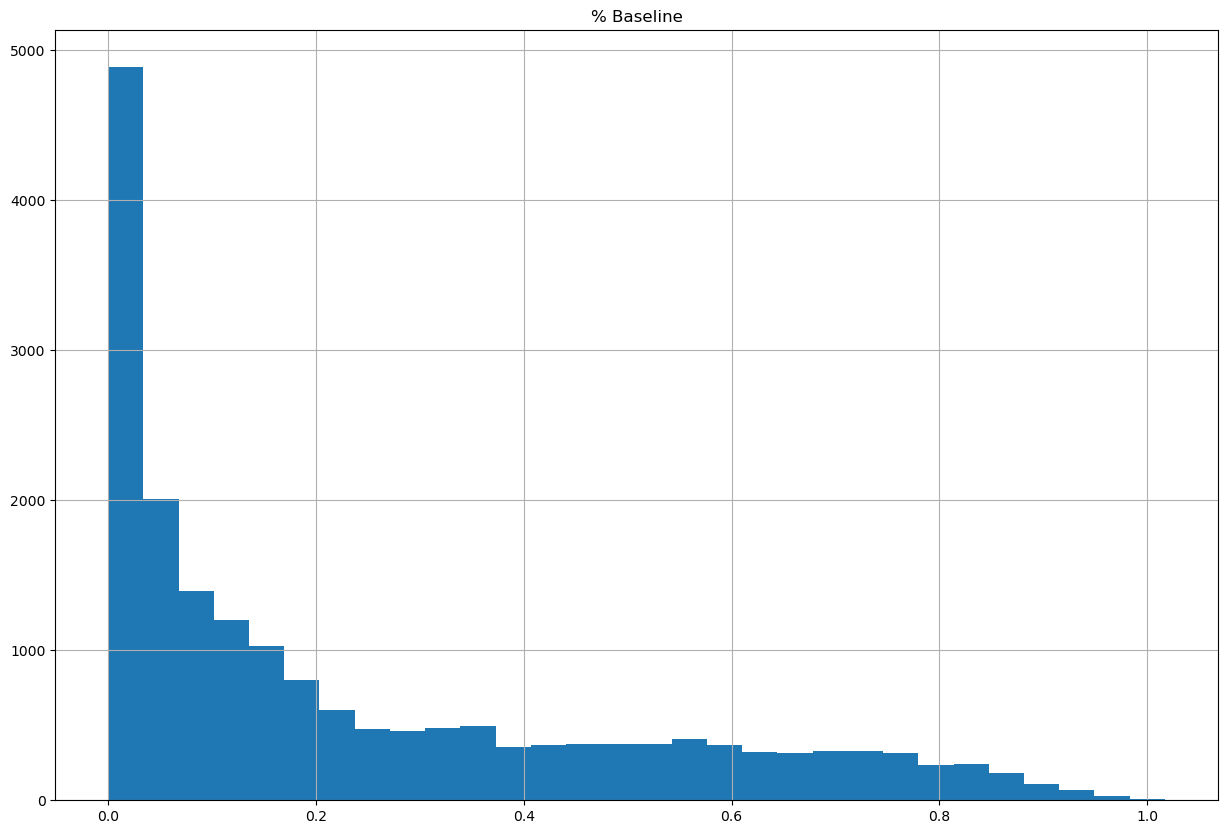

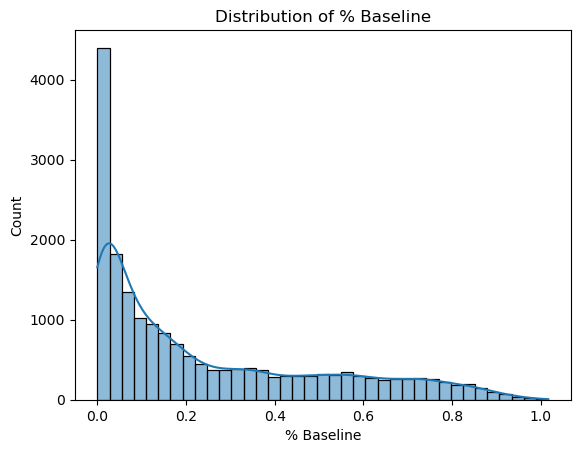

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical features
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

# Check the distribution of the target variable (% Baseline)
sns.histplot(train_data['% Baseline'], kde=True)
plt.title('Distribution of % Baseline')
plt.show()


## 3. About the Data

In [131]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')



# Print column names to verify
print("Columns in the training data:", train_data.columns)
print("Columns in the test data:", test_data.columns)
print("Columns in solar_irradiance:", solar_irradiance.columns)
print("Columns in weather:", weather.columns)

# Display first few rows to understand structure
print("Training Data Sample:")
print(train_data.head())
print("Solar Irradiance Sample:")
print(solar_irradiance.head())
print("Weather Data Sample:")
print(weather.head())


Columns in the training data: Index(['Timestamp', '% Baseline'], dtype='object')
Columns in the test data: Index(['Timestamp', '% Baseline'], dtype='object')
Columns in solar_irradiance: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure', 'Timestamp',
       'DayOfYear', 'HourOfDay', 'ClearSkyIndex_GHI', 'ClearSkyIndex_DNI',
       'ClearSkyIndex_DHI'],
      dtype='object')
Columns in weather: Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')
Training D

In [132]:
# Convert `date_time` in weather to datetime format
weather['Timestamp'] = pd.to_datetime(weather['date_time'])

# Convert `Timestamp` in solar_irradiance to datetime format if not already
solar_irradiance['Timestamp'] = pd.to_datetime(solar_irradiance['Timestamp'])

# Convert `Timestamp` in train_data and test_data to datetime format
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

# Merge datasets
train_data = train_data.merge(solar_irradiance, on='Timestamp', how='left')
train_data = train_data.merge(weather, on='Timestamp', how='left')

test_data = test_data.merge(solar_irradiance, on='Timestamp', how='left')
test_data = test_data.merge(weather, on='Timestamp', how='left')


In [133]:
# Drop irrelevant columns for model training
features = train_data.drop(['Timestamp', '% Baseline'], axis=1, errors='ignore')
target = train_data['% Baseline']

# Fill missing values with median (or use another strategy if needed)
features.fillna(features.median(), inplace=True)

# Optionally, encode categorical variables if any
# features = pd.get_dummies(features, columns=['CategoricalColumnName'])

# Check shapes and preview data
print("\nFeatures Shape:", features.shape)
print("Target Shape:", target.shape)
print(features.head())



Features Shape: (18942, 48)
Target Shape: (18942,)
   Year Month Day Hour Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  ...  \
0  2014     1   1    7      0  0.0  0.0  0.0           0.0           0.0  ...   
1  2014     1   1    8      0  0.0  0.0  0.0           0.0           0.0  ...   
2  2014     1   1    9      0  0.0  0.0  0.0           0.0           0.0  ...   
3  2014     1   1   10      0  0.0  0.0  0.0           0.0           0.0  ...   
4  2014     1   1   11      0  0.0  0.0  0.0           0.0           0.0  ...   

   WindChillC WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  \
0         -13           24          13        52       0.0      1027     -5   
1         -12           26          11        49       0.0      1027     -5   
2         -11           27           9        46       0.0      1028     -4   
3         -10           25          15        46       0.0      1028     -4   
4         -10           23          21        45       0.0      10

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\3220173007.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.fillna(features.median(), inplace=True)


In [134]:
# 4 Identify non-numeric columns
non_numeric_columns = features.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset'], dtype='object')


In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load datasets
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

# Convert 'date_time' in weather to datetime format if it's the correct column
if 'date_time' in weather.columns:
    weather['Timestamp'] = pd.to_datetime(weather['date_time'])
else:
    print("Column 'date_time' not found in weather dataset. Check column names.")

# Convert 'Timestamp' in solar_irradiance to datetime format
solar_irradiance['Timestamp'] = pd.to_datetime(solar_irradiance['Timestamp'])

# Convert 'Timestamp' in train_data and test_data to datetime format
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

# Merge datasets based on 'Timestamp'
train_data = train_data.merge(solar_irradiance, on='Timestamp', how='left')
train_data = train_data.merge(weather, on='Timestamp', how='left')

test_data = test_data.merge(solar_irradiance, on='Timestamp', how='left')
test_data = test_data.merge(weather, on='Timestamp', how='left')

# Drop rows with missing target values in training data
train_data.dropna(subset=['% Baseline'], inplace=True)

# Select features and target for training
features = train_data.drop(columns=['Timestamp', '% Baseline'])
target = train_data['% Baseline']

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical columns to numeric using one-hot encoding
if len(categorical_cols) > 0:
    features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Handle categorical columns in test features similarly
test_features = test_data.drop(columns=['Timestamp'])
if len(categorical_cols) > 0:
    test_features = pd.get_dummies(test_features, columns=categorical_cols, drop_first=True)

# Ensure that test features have the same columns as training features
missing_cols = set(features.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0
test_features = test_features[features.columns]

# Check if features and target are non-empty
print("Features shape:", features.shape)
print("Target shape:", target.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the RMSE on the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {val_rmse}')

# Predict on the test set
test_predictions = model.predict(test_features)

# Create submission DataFrame
submission = pd.DataFrame({
    'Timestamp': test_data['Timestamp'],
    '% Baseline': test_predictions
})

# Save submission to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Categorical columns: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'date_time',
       'moonrise', 'moonset', 'sunrise', 'sunset'],
      dtype='object')


C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_2436\696655012.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

Features shape: (18942, 21168)
Target shape: (18942,)
Validation RMSE: 0.08622166691706656
Submission file saved as 'submission.csv'


In [136]:
sample_submission = pd.read_csv('dataset/sample_submission.csv')
submission = pd.read_csv("submission.csv")

In [137]:
sample_submission.head()

Timestamp  % Baseline
0   Oct 1, 2017 6am      0.0005
1   Oct 1, 2017 7am      0.0005
2   Oct 1, 2017 8am      0.0005
3   Oct 1, 2017 9am      0.0005
4  Oct 1, 2017 10am      0.0005

In [138]:
submission.head()

Timestamp  % Baseline
0  2017-10-01 06:00:00    0.043505
1  2017-10-01 07:00:00    0.073766
2  2017-10-01 08:00:00    0.122740
3  2017-10-01 09:00:00    0.276086
4  2017-10-01 10:00:00    0.474933

In [139]:
solar_irradiance.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure', 'Timestamp',
       'DayOfYear', 'HourOfDay', 'ClearSkyIndex_GHI', 'ClearSkyIndex_DNI',
       'ClearSkyIndex_DHI'],
      dtype='object')

In [140]:
weather.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Timestamp'],
      dtype='object')

In [141]:
import pandas as pd
from datetime import datetime

# Function to format the timestamp
def format_timestamp(ts):
    # Parse the timestamp using the correct format
    parsed_datetime = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S")
    # Format the timestamp to the desired format
    formatted_timestamp = parsed_datetime.strftime("%b %d, %Y %I%p").lower()
    # Remove leading zero manually for day and hour
    formatted_timestamp = formatted_timestamp.replace(' 0', ' ')
    # Capitalize the first letter of the month
    return formatted_timestamp.capitalize()

# Load the CSV file into a DataFrame
df = pd.read_csv('submission.csv')

# Apply the formatting function to the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].apply(format_timestamp)

# Save the modified DataFrame to a new CSV file
df.to_csv('formatted_submission.csv', index=False)

print("Timestamps have been formatted and saved to 'formatted_submission.csv'.")


Timestamps have been formatted and saved to 'formatted_submission.csv'.
